In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [5]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
Y = df['v1']
X = df['v2']

Converting to Lowercase

In [7]:
X = X.str.lower()

Removing punctuations

In [8]:
import string 
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

X = X.apply(lambda text: remove_punctuation(text))

Removing Stopwords

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rishs\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [11]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

X = X.apply(lambda text: remove_stopwords(text))

In [12]:
cleaned_df = pd.concat([Y, X], axis=1)
cleaned_df

,v1,v2
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah dont think goes usf lives around though
...,...,...
5567,spam,2nd time tried 2 contact u u å£750 pound prize...
5568,ham,ì b going esplanade fr home
5569,ham,pity mood soany suggestions
5570,ham,guy bitching acted like id interested buying s...


In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rishs\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Tokenizing

In [14]:
from nltk.tokenize import word_tokenize
def tokenize(text):
    words = word_tokenize(text)
    return [word for word in words if word.isalpha()]

In [15]:
X = X.apply(tokenize)

In [16]:
token_df = pd.concat([Y, X], axis=1)
token_df

,v1,v2
0,ham,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,"[ok, lar, joking, wif, u, oni]"
2,spam,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"[nah, dont, think, goes, usf, lives, around, t..."
...,...,...
5567,spam,"[time, tried, contact, u, u, pound, prize, cla..."
5568,ham,"[ì, b, going, esplanade, fr, home]"
5569,ham,"[pity, mood, soany, suggestions]"
5570,ham,"[guy, bitching, acted, like, id, interested, b..."


Top 10 Words for Ham and Spam

In [17]:
from collections import Counter
def get_top_n_words(df, label, n=10):
    all_words = [word for tokens in df[df['v1'] == label]['v2'] for word in tokens]
    word_freq = Counter(all_words)
    return word_freq.most_common(n)

In [18]:
top_10_spam = get_top_n_words(token_df, 'spam')
top_10_ham = get_top_n_words(token_df, 'ham')

print("Top 10 words in spam messages:")
print(top_10_spam)

print("\nTop 10 words in ham messages:")
print(top_10_ham)

Top 10 words in spam messages:
[('call', 347), ('free', 216), ('txt', 150), ('u', 147), ('ur', 144), ('mobile', 123), ('text', 120), ('claim', 113), ('stop', 113), ('reply', 101)]

Top 10 words in ham messages:
[('u', 972), ('im', 449), ('get', 303), ('ltgt', 276), ('ok', 272), ('dont', 257), ('go', 247), ('got', 243), ('ur', 240), ('ill', 236)]


Top 10 Bigrams and Trigrams

In [19]:
def get_top_n_ngrams(df, label, n, ngram=2):
    all_ngrams = []
    for tokens in df[df['v1'] == label]['v2']:
        if ngram == 2:
            all_ngrams.extend(list(nltk.bigrams(tokens)))
        elif ngram == 3:
            all_ngrams.extend(list(nltk.trigrams(tokens)))
    ngram_freq = Counter(all_ngrams)
    return ngram_freq.most_common(n)


In [20]:
top_10_bigrams_spam = get_top_n_ngrams(token_df, 'spam', 10, ngram=2)
top_10_bigrams_ham = get_top_n_ngrams(token_df, 'ham', 10, ngram=2)
top_10_trigrams_spam = get_top_n_ngrams(token_df, 'spam', 10, ngram=3)
top_10_trigrams_ham = get_top_n_ngrams(token_df, 'ham', 10, ngram=3)

print("Top 10 bigrams in spam messages:")
print(top_10_bigrams_spam)

print("\nTop 10 bigrams in ham messages:")
print(top_10_bigrams_ham)

print("\nTop 10 trigrams in spam messages:")
print(top_10_trigrams_spam)

print("\nTop 10 trigrams in ham messages:")
print(top_10_trigrams_ham)

Top 10 bigrams in spam messages:
[(('please', 'call'), 44), (('contact', 'u'), 24), (('po', 'box'), 24), (('guaranteed', 'call'), 23), (('call', 'landline'), 23), (('prize', 'guaranteed'), 22), (('selected', 'receive'), 19), (('send', 'stop'), 19), (('every', 'week'), 19), (('await', 'collection'), 19)]

Top 10 bigrams in ham messages:
[(('gon', 'na'), 58), (('call', 'later'), 50), (('ill', 'call'), 48), (('let', 'know'), 39), (('sorry', 'ill'), 39), (('r', 'u'), 37), (('u', 'r'), 33), (('dont', 'know'), 32), (('good', 'morning'), 30), (('wan', 'na'), 28)]

Top 10 trigrams in spam messages:
[(('prize', 'guaranteed', 'call'), 21), (('call', 'land', 'line'), 18), (('private', 'account', 'statement'), 16), (('call', 'identifier', 'code'), 15), (('guaranteed', 'call', 'land'), 15), (('identifier', 'code', 'expires'), 14), (('land', 'line', 'claim'), 14), (('draw', 'shows', 'prize'), 13), (('shows', 'prize', 'guaranteed'), 13), (('account', 'statement', 'shows'), 13)]

Top 10 trigrams in ha

Cloud of Words

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [22]:
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

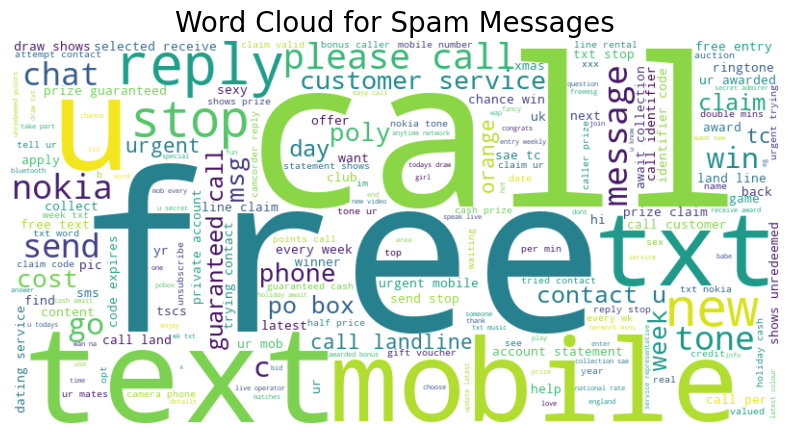

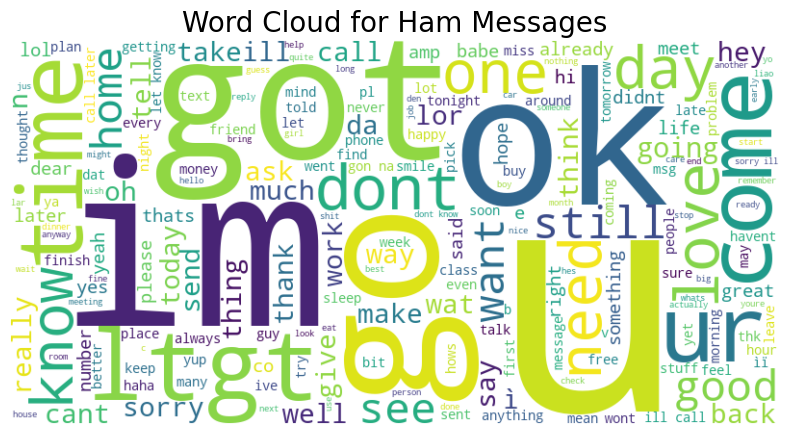

In [23]:
spam_words = [word for tokens in token_df[token_df['v1'] == 'spam']['v2'] for word in tokens]
ham_words = [word for tokens in token_df[token_df['v1'] == 'ham']['v2'] for word in tokens]

# Generate and display word clouds
generate_wordcloud(spam_words, 'Word Cloud for Spam Messages')
generate_wordcloud(ham_words, 'Word Cloud for Ham Messages')

Bag of Words CountVectorizer

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:

vectorizer = CountVectorizer()
x = vectorizer.fit_transform(df['v2'])
bow_df = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())
print("Bag-of-Words Vectors:")
print(bow_df)

Bag-of-Words Vectors:
      00  000  000pes  008704050406  0089  0121  01223585236  01223585334  \
0      0    0       0             0     0     0            0            0   
1      0    0       0             0     0     0            0            0   
2      0    0       0             0     0     0            0            0   
3      0    0       0             0     0     0            0            0   
4      0    0       0             0     0     0            0            0   
...   ..  ...     ...           ...   ...   ...          ...          ...   
5567   0    0       0             0     0     0            0            0   
5568   0    0       0             0     0     0            0            0   
5569   0    0       0             0     0     0            0            0   
5570   0    0       0             0     0     0            0            0   
5571   0    0       0             0     0     0            0            0   

      0125698789  02  ...  ó_  û_  û_thanks  ûªm  ûªt

Using Random Forest Classifier

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, df['v1'], test_size=0.2, random_state=42)

In [33]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [35]:
pred = rf.predict(X_test)

In [40]:
le = LabelEncoder()
pred = le.fit_transform(pred)
y_test = le.fit_transform(y_test)

In [41]:
f1 = f1_score(pred,y_test,average='macro')

In [43]:
print('F1 Score:',f1)

F1 Score: 0.9481515926528714


TFIDF (Without Preprocessing)

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:

vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(df['v2'])
tfidf_df = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())
print("TFIDF Vectors:")
print(tfidf_df)

TFIDF Vectors:
       00  000  000pes  008704050406  0089  0121  01223585236  01223585334  \
0     0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
1     0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
2     0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
3     0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
4     0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
...   ...  ...     ...           ...   ...   ...          ...          ...   
5567  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
5568  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
5569  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
5570  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
5571  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   

      0125698789   02  ...   ó_   û_  û_thanks  

In [46]:
X_train, X_test, y_train, y_test = train_test_split(x, df['v1'], test_size=0.2, random_state=42)

In [47]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [48]:
pred = rf.predict(X_test)

In [49]:
pred = le.fit_transform(pred)
y_test = le.fit_transform(y_test)

In [50]:
f1 = f1_score(pred,y_test,average='macro')
print('F1 :',f1)

F1 : 0.9436511368039218


Not Much Difference between both the techniques

Preprocessing 

In [51]:
import re
from bs4 import BeautifulSoup

In [52]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)
def remove_emails(text):
    email_pattern = re.compile(r'\S*@\S*\s?')
    return email_pattern.sub(r'', text)
def remove_numbers(text):
    number_pattern = re.compile(r'\d+')
    return number_pattern.sub(r'', text)
def lemmetization(text):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])


In [54]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rishs\AppData\Roaming\nltk_data...


True

In [55]:
df['v2'] = df['v2'].apply(lambda x: remove_urls(x))
df['v2'] = df['v2'].apply(lambda x: remove_html(x))
df['v2'] = df['v2'].apply(lambda x: remove_emails(x))
df['v2'] = df['v2'].apply(lambda x: remove_numbers(x))
df['v2'] = df['v2'].apply(lambda x: lemmetization(x))

TFIDF 

In [56]:

vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(df['v2'])
tfidf_df = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())
print("TFIDF Vectors:")
print(tfidf_df)

TFIDF Vectors:
      ____   aa  aah  aaniye  aaooooright  aathi   ab  abbey  abdomen  abeg  \
0      0.0  0.0  0.0     0.0          0.0    0.0  0.0    0.0      0.0   0.0   
1      0.0  0.0  0.0     0.0          0.0    0.0  0.0    0.0      0.0   0.0   
2      0.0  0.0  0.0     0.0          0.0    0.0  0.0    0.0      0.0   0.0   
3      0.0  0.0  0.0     0.0          0.0    0.0  0.0    0.0      0.0   0.0   
4      0.0  0.0  0.0     0.0          0.0    0.0  0.0    0.0      0.0   0.0   
...    ...  ...  ...     ...          ...    ...  ...    ...      ...   ...   
5567   0.0  0.0  0.0     0.0          0.0    0.0  0.0    0.0      0.0   0.0   
5568   0.0  0.0  0.0     0.0          0.0    0.0  0.0    0.0      0.0   0.0   
5569   0.0  0.0  0.0     0.0          0.0    0.0  0.0    0.0      0.0   0.0   
5570   0.0  0.0  0.0     0.0          0.0    0.0  0.0    0.0      0.0   0.0   
5571   0.0  0.0  0.0     0.0          0.0    0.0  0.0    0.0      0.0   0.0   

      ...   ó_   û_  û_thanks  ûªm  

In [57]:
X_train, X_test, y_train, y_test = train_test_split(x, df['v1'], test_size=0.2, random_state=42)

In [58]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [59]:
pred = rf.predict(X_test)

In [60]:
pred = le.fit_transform(pred)
y_test = le.fit_transform(y_test)

In [61]:
f1 = f1_score(pred,y_test,average='macro')
print('F1 :',f1)

F1 : 0.941379258547137


In [62]:
print(
    """
    F1 BOW : 0.9481515926528714
    F1 TFIDF : 0.9436511368039218
    F1 TFIDF + Preprocessing : 0.941379258547137
    """
)


    F1 BOW : 0.9481515926528714
    F1 TFIDF : 0.9436511368039218
    F1 TFIDF + Preprocessing : 0.941379258547137
    
